<a href="https://colab.research.google.com/github/EstherDev-ops/covid19-global-data-analysis/blob/main/Esther_Plp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/owid-covid-data.csv'
df = pd.read_csv(csv_path)

# Preview first 5 rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
# Preview first 5 rows
df.head()

# Check columns
print(df.columns)

# Dataset info (types and non-null counts)
print(df.info())

# Check for missing values
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Rang

# Task 1: Load and Explore the Dataset

In this task, we loaded the global COVID-19 dataset from Our World in Data.
The dataset contains daily COVID-19 metrics for each country, such as total cases, new cases, total deaths, new deaths, and vaccination data, along with additional country-level indicators.

Steps performed:
- Loaded the dataset using pandas.
- Previewed the first few rows with df.head().
- Checked the structure using df.info().
- Checked for missing values using df.isnull().sum().

Observation:
The dataset has 41 columns and includes both numerical and categorical data.
Some columns have missing values (NaN), which will be handled in the cleaning step.

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Fill missing numerical values for key metrics
num_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
df_filtered[num_cols] = df_filtered[num_cols].fillna(method='ffill')

# Summary statistics
print("Summary statistics for selected countries:")
print(df_filtered.groupby('location')[num_cols].describe())

# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
print("\nLatest death rates per country:")
print(df_filtered.groupby('location')['death_rate'].last())

Summary statistics for selected countries:
              total_cases                                                      \
                    count          mean           std  min     25%        50%   
location                                                                        
India               264.0  8.012120e+05  1.346650e+06  0.0   28.75    65045.5   
Kenya               198.0  2.249977e+05  1.045736e+06  1.0  417.00     4426.0   
United States       264.0  1.982712e+06  2.162657e+06  0.0  214.50  1319670.0   

                                     new_cases                ...  \
                      75%        max     count          mean  ...   
location                                                      ...   
India           944354.75  5308014.0     264.0  20106.125000  ...   
Kenya            25662.25  5308014.0     198.0   3956.666667  ...   
United States  3448503.25  6724667.0     264.0  25472.223485  ...   

              total_deaths           new_deaths        

/tmp/ipython-input-1948101391.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[num_cols] = df_filtered[num_cols].fillna(method='ffill')


# Task 2: Clean and Analyze the Dataset

In this task, we clean the dataset and perform basic analysis on selected countries.

Steps performed:
- Converted the 'date' column to datetime format.
- Filtered for selected countries: Kenya, United States, India.
- Filled missing numerical values for key COVID-19 metrics using forward fill.
- Computed basic statistics for total_cases, new_cases, total_deaths, and new_deaths.
- Calculated the death rate per country (total_deaths / total_cases) for insights.

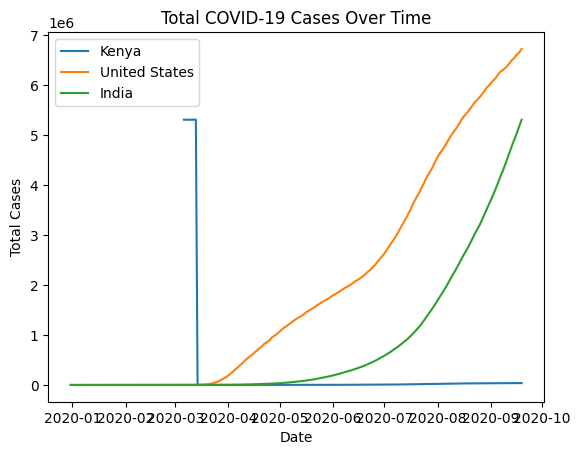

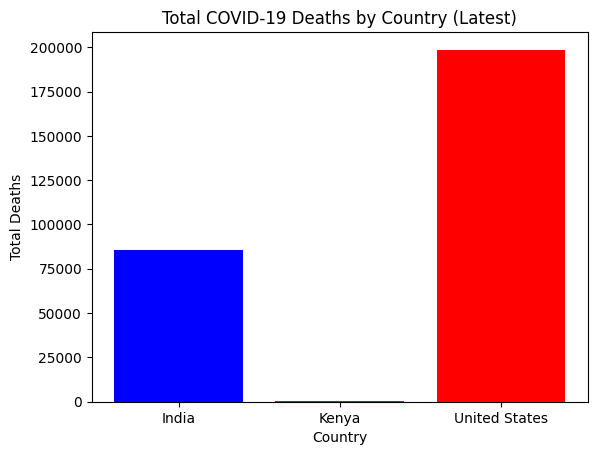

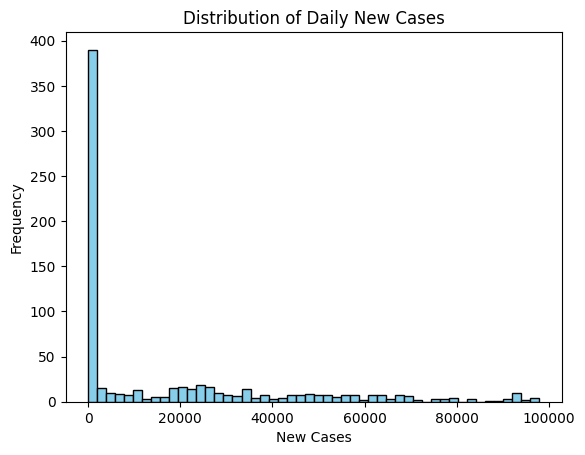

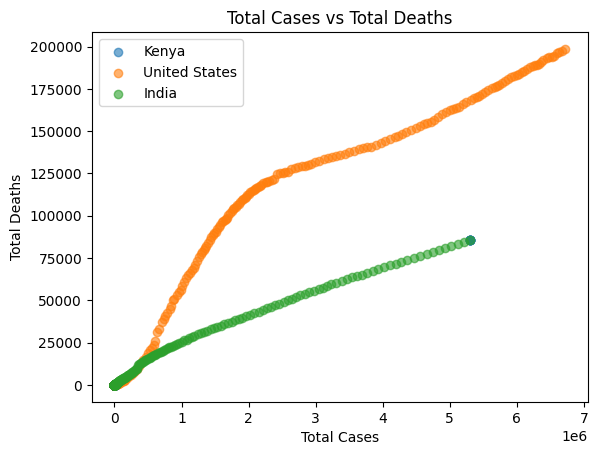

In [ ]:
import matplotlib.pyplot as plt

# 1. Line chart: Total cases over time
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

# 2. Bar chart: Latest total deaths per country
latest_data = df_filtered.groupby('location').last()
plt.bar(latest_data.index, latest_data['total_deaths'], color=['blue', 'green', 'red'])
plt.title("Total COVID-19 Deaths by Country (Latest)")
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.show()

# 3. Histogram: Distribution of new cases
plt.hist(df_filtered['new_cases'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Daily New Cases")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot: Total cases vs Total deaths
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.scatter(subset['total_cases'], subset['total_deaths'], label=country, alpha=0.6)
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

# Task 3: Data Visualization

In this task, we visualize COVID-19 trends for selected countries (Kenya, USA, India) to understand patterns over time.

Steps performed:
- Line chart: Shows the trend of total cases over time.
- Bar chart: Compares total deaths for each country.
- Histogram: Displays distribution of new cases.
- Scatter plot: Shows relationship between total cases and total deaths.

Observations:
- Line chart: USA shows the highest cumulative cases; Kenya has the lowest.
- Bar chart: Deaths vary significantly by country.
- Histogram: Daily new cases are skewed, with spikes at certain periods.
- Scatter plot: Positive correlation between total cases and total deaths across countries.